In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

data_dir = '../data/'


In [5]:
print('loading prior orders')
prior_orders = pd.read_csv(data_dir + 'order_products__prior.csv', dtype={
        'order_id': np.int32,
        'product_id': np.int32,
        'add_to_cart_order': np.int16,
        'reordered': np.int8})
print('loading orders')
orders = pd.read_csv(data_dir + 'orders.csv', dtype={
        'order_id': np.int32,
        'user_id': np.int32,
        'eval_set': 'category',
        'order_number': np.int16,
        'order_dow': np.int8,
        'order_hour_of_day': np.int8,
        'days_since_prior_order': np.float32})
print('loading aisles info')
aisles = pd.read_csv(data_dir + 'products.csv', engine='c',
                           usecols = ['product_id','aisle_id'],
                       dtype={'product_id': np.int32, 'aisle_id': np.int32})
pd.set_option('display.float_format', lambda x: '%.3f' % x)

loading prior orders
loading orders
loading aisles info


Get prior order buckets

In [14]:
num_orders = prior_orders.groupby('product_id').order_id.count()

plot iqr of orders by product_id

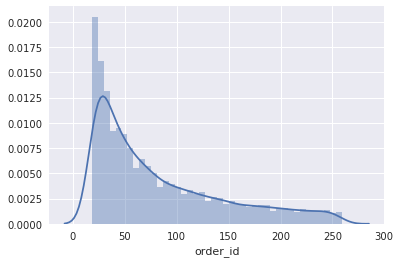

In [23]:
num_orders.describe()
iqr = num_orders.quantile([.25,.75]).values
sns.distplot(num_orders.apply(lambda x: x if (x>iqr[0] and x<iqr[1]) else None).dropna())

Look at reorder rate

In [47]:
## first drop all orders that have no reorder items, assuming this might be the first order or just are not typical
reorder_rate = prior_orders.groupby('order_id').reordered.sum()
# Look at top 5 
print(reorder_rate.value_counts()[:5])
reorder_rate = reorder_rate.to_frame()

0.000    388513
2.000    330770
1.000    327898
3.000    312493
4.000    281704
5.000    246626
Name: reordered, dtype: int64


In [48]:
index_list = reorder_rate[reorder_rate['reordered']==0].index
reorder_rate = prior_orders[~prior_orders['order_id'].isin(index_list)]
reorder_rate = reorder_rate.groupby('product_id').reordered.sum()
reorder_rate.describe()

count    49612.000
mean       385.522
std       3604.045
min          0.000
25%          4.000
50%         22.000
75%        116.000
max     398609.000
Name: reordered, dtype: float64

Drop IQR again


In [ ]:
iqr = reorder_rate.quartile([.25,.75]).values
sns.distplot(reorder_rate.apply(lambda x: x if (x>iqr[0] and )))